<a href="https://colab.research.google.com/github/jvrupp/Curso_Juntando/blob/main/Juntando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
d1='1A 1B 1C 1D 1E 1F'.split(' ')
d2='2A 2B 2C 2D 2E 2F'.split(' ')
d3='1A 1B 1C 1G'.split(' ')
d4='3A 3B 3C 3G'.split(' ')
d5='4A 4B 4C 4G'.split(' ')
df1 ={'col1':d1,'col2':d2}
df2 ={'col1':d3,'col3':d4}
df3 ={'col1':d3,'col4':d5}
df1=pd.DataFrame(df1)
df2=pd.DataFrame(df2)
df3=pd.DataFrame(df3)


#Join, Merge,Concat,Append

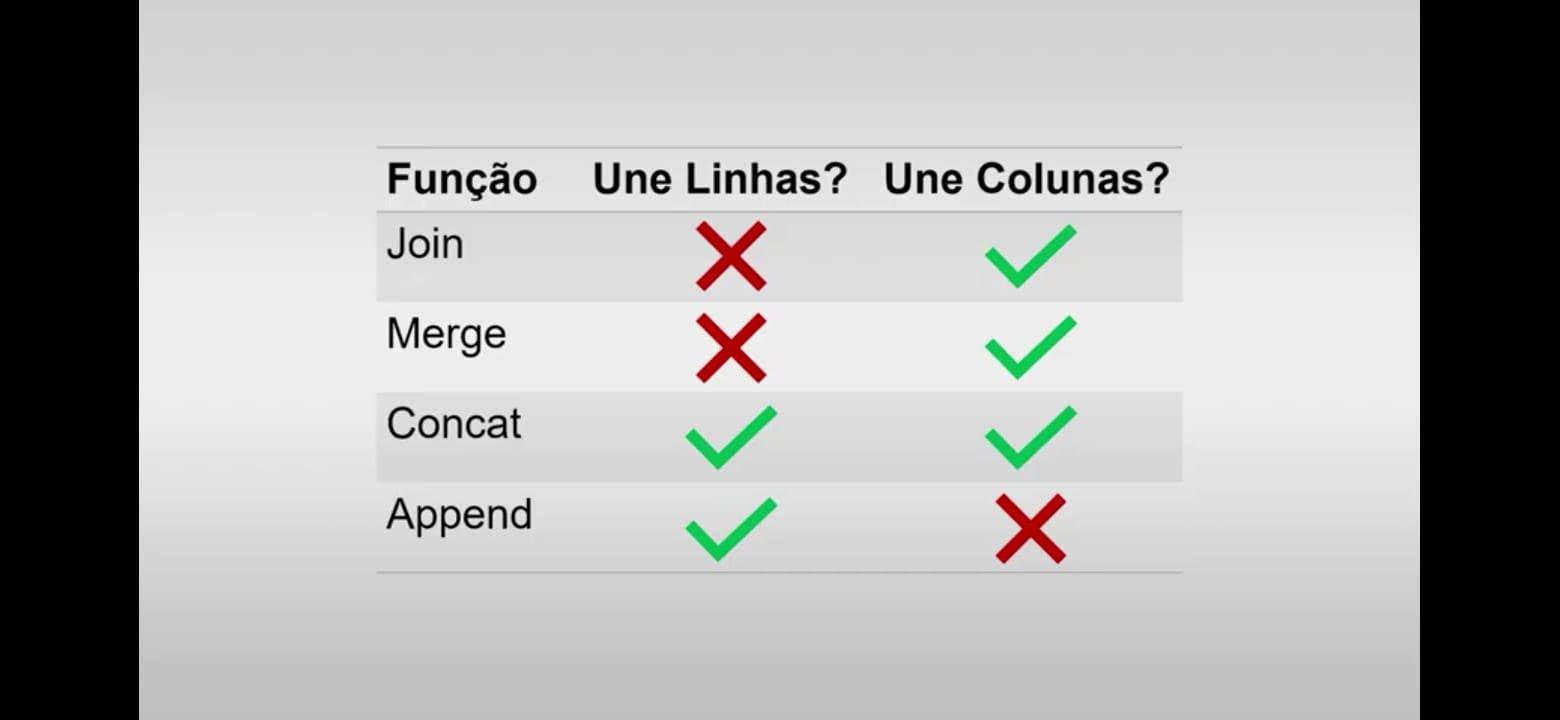*Tipos de agrupamento*

CONCATenando coisas...

In [ ]:
df1

,col1,col2
0,1A,2A
1,1B,2B
2,1C,2C
3,1D,2D
4,1E,2E
5,1F,2F


In [ ]:
df2

,col1,col3
0,1A,3A
1,1B,3B
2,1C,3C
3,1G,3G


In [ ]:
pd.concat([df1,df2]) #por padrao concatena por V=0   e H=1

,col1,col2,col3
0,1A,2A,NaN
1,1B,2B,NaN
2,1C,2C,NaN
3,1D,2D,NaN
4,1E,2E,NaN
5,1F,2F,NaN
0,1A,NaN,3A
1,1B,NaN,3B
2,1C,NaN,3C
3,1G,NaN,3G


In [ ]:
pd.concat([df1,df2],axis=0,ignore_index=True) 

,col1,col2,col3
0,1A,2A,NaN
1,1B,2B,NaN
2,1C,2C,NaN
3,1D,2D,NaN
4,1E,2E,NaN
5,1F,2F,NaN
6,1A,NaN,3A
7,1B,NaN,3B
8,1C,NaN,3C
9,1G,NaN,3G


In [ ]:
pd.concat([df1,df2],axis=0,ignore_index=True ,join='inner') #outer , inner 

,col1
0,1A
1,1B
2,1C
3,1D
4,1E
5,1F
6,1A
7,1B
8,1C
9,1G


In [ ]:
pd.concat([df1,df2],axis=1) # junta mediante o index

,col1,col3,col1,col2
0,1A,3A,1A,2A
1,1B,3B,1B,2B
2,1C,3C,1C,2C
3,1G,3G,1D,2D
4,NaN,NaN,1E,2E
5,NaN,NaN,1F,2F


In [ ]:
pd.concat([df2,df1],axis=1) # a ordem da lista , IMPORTA

,col1,col3,col1,col2
0,1A,3A,1A,2A
1,1B,3B,1B,2B
2,1C,3C,1C,2C
3,1G,3G,1D,2D
4,NaN,NaN,1E,2E
5,NaN,NaN,1F,2F


In [ ]:
pd.concat([df1,df2],axis=0,keys=['primeiraDF','segundaDF'])

col1 col2 col3
primeiraDF 0   1A   2A  NaN
           1   1B   2B  NaN
           2   1C   2C  NaN
           3   1D   2D  NaN
           4   1E   2E  NaN
           5   1F   2F  NaN
segundaDF  0   1A  NaN   3A
           1   1B  NaN   3B
           2   1C  NaN   3C
           3   1G  NaN   3G

In [ ]:
pd.concat([df1,df2,df3],axis=0,keys=['primeiraDF','segundaDF','terceiraDF'])

col1 col2 col3 col4
primeiraDF 0   1A   2A  NaN  NaN
           1   1B   2B  NaN  NaN
           2   1C   2C  NaN  NaN
           3   1D   2D  NaN  NaN
           4   1E   2E  NaN  NaN
           5   1F   2F  NaN  NaN
segundaDF  0   1A  NaN   3A  NaN
           1   1B  NaN   3B  NaN
           2   1C  NaN   3C  NaN
           3   1G  NaN   3G  NaN
terceiraDF 0   1A  NaN  NaN   4A
           1   1B  NaN  NaN   4B
           2   1C  NaN  NaN   4C
           3   1G  NaN  NaN   4G

Vamos JOINtar colunas...

In [ ]:
df1

,col1,col2
0,1A,2A
1,1B,2B
2,1C,2C
3,1D,2D
4,1E,2E
5,1F,2F


In [ ]:
df2

,col1,col3
0,1A,3A
1,1B,3B
2,1C,3C
3,1G,3G


In [ ]:
df1.join(df2,lsuffix='_x',rsuffix='_y',how='inner')

,col1_x,col2,col1_y,col3
0,1A,2A,1A,3A
1,1B,2B,1B,3B
2,1C,2C,1C,3C
3,1D,2D,1G,3G


In [ ]:
df1.join(df2.set_index('col1'),on='col1',how='inner')#inner pega todos os em comum

,col1,col2,col3
0,1A,2A,3A
1,1B,2B,3B
2,1C,2C,3C


In [ ]:
df1.join(df2.set_index('col1'),on='col1',how='outer')#outer pega TUDO TUDO

,col1,col2,col3
0.0,1A,2A,3A
1.0,1B,2B,3B
2.0,1C,2C,3C
3.0,1D,2D,NaN
4.0,1E,2E,NaN
5.0,1F,2F,NaN
NaN,1G,NaN,3G


In [ ]:
df1.join(df2.set_index('col1'),on='col1',how='left')#nao permite colunas duplicadas

,col1,col2,col3
0,1A,2A,3A
1,1B,2B,3B
2,1C,2C,3C
3,1D,2D,NaN
4,1E,2E,NaN
5,1F,2F,NaN


In [ ]:
df1.join(df2.set_index('col1'),on='col1',how='right')#nao permite colunas duplicadas

,col1,col2,col3
0.0,1A,2A,3A
1.0,1B,2B,3B
2.0,1C,2C,3C
NaN,1G,NaN,3G


In [ ]:
print(df1)
print(df2)

  col1 col2
0   1A   2A
1   1B   2B
2   1C   2C
3   1D   2D
4   1E   2E
5   1F   2F
  col1 col3
0   1A   3A
1   1B   3B
2   1C   3C
3   1G   3G


In [ ]:
df2.set_index('col1')

,col3
col1,
1A,3A
1B,3B
1C,3C
1G,3G


Append dataframes

In [ ]:
newDf=df1.append(df2,ignore_index=False)
newDf

,col1,col2,col3
0,1A,2A,NaN
1,1B,2B,NaN
2,1C,2C,NaN
3,1D,2D,NaN
4,1E,2E,NaN
5,1F,2F,NaN
0,1A,NaN,3A
1,1B,NaN,3B
2,1C,NaN,3C
3,1G,NaN,3G


In [ ]:
newDf.append({'col1':'1Z','col2':'2Z','col3':'3Z'},ignore_index=True)

,col1,col2,col3
0,1A,2A,NaN
1,1B,2B,NaN
2,1C,2C,NaN
3,1D,2D,NaN
4,1E,2E,NaN
5,1F,2F,NaN
6,1A,NaN,3A
7,1B,NaN,3B
8,1C,NaN,3C
9,1G,NaN,3G


MERGEando colunas


In [ ]:
print(df1)
print(df2)
df1.merge(df2,how='inner')

  col1 col2
0   1A   2A
1   1B   2B
2   1C   2C
3   1D   2D
4   1E   2E
5   1F   2F
  col1 col3
0   1A   3A
1   1B   3B
2   1C   3C
3   1G   3G


,col1,col2,col3
0,1A,2A,3A
1,1B,2B,3B
2,1C,2C,3C


In [ ]:
df1.merge(df2,how='right')

,col1,col2,col3
0,1A,2A,3A
1,1B,2B,3B
2,1C,2C,3C
3,1G,NaN,3G


In [ ]:
df1.merge(df2,how='left').dropna()

,col1,col2,col3
0,1A,2A,3A
1,1B,2B,3B
2,1C,2C,3C


In [ ]:
df1.merge(df2,how='outer')#baseado na coluna de referencia

,col1,col2,col3
0,1A,2A,3A
1,1B,2B,3B
2,1C,2C,3C
3,1D,2D,NaN
4,1E,2E,NaN
5,1F,2F,NaN
6,1G,NaN,3G


In [ ]:
df1.merge(df2,left_on='col1',right_on='col1')#no caso de termos colunas com nomes distinto em dataframes

,col1,col2,col3
0,1A,2A,3A
1,1B,2B,3B
2,1C,2C,3C


In [ ]:
#unindo pelo indice
df1.merge(df2,how='outer')

,col1,col2,col3
0,1A,2A,3A
1,1B,2B,3B
2,1C,2C,3C
3,1D,2D,NaN
4,1E,2E,NaN
5,1F,2F,NaN
6,1G,NaN,3G


In [ ]:
df1.merge(df2,how='outer',indicator=True)

,col1,col2,col3,_merge
0,1A,2A,3A,both
1,1B,2B,3B,both
2,1C,2C,3C,both
3,1D,2D,NaN,left_only
4,1E,2E,NaN,left_only
5,1F,2F,NaN,left_only
6,1G,NaN,3G,right_only


In [ ]:
print(df1)
print(df3)
df3.merge(df2,how='left',validate='m:1')

  col1 col2
0   1A   2A
1   1B   2B
2   1C   2C
3   1D   2D
4   1E   2E
5   1F   2F
  col1 col4
0   1A   4A
1   1B   4B
2   1C   4C
3   1G   4G


,col1,col4,col3
0,1A,4A,3A
1,1B,4B,3B
2,1C,4C,3C
3,1G,4G,3G


In [ ]:
print(df1)
print(df2)

  col1 col2
0   1A   2A
1   1B   2B
2   1C   2C
3   1D   2D
4   1E   2E
5   1F   2F
  col1 col3
0   1A   3A
1   1B   3B
2   1C   3C
3   1G   3G
